## 2.4

### 2.4.1

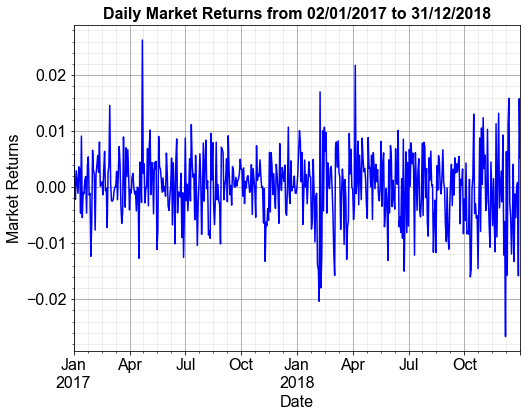

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('fsp_case_31_BSD.csv', index_col=0,header=[0 ,1])
df.fillna(value = 0, inplace = True)
ret_stock_final = df['ret'].copy()
ret_stock_final.index = pd.to_datetime(ret_stock_final.index) 
ret_stock_final = ret_stock_final.sort_index() 
market_return_final = ret_stock_final.mean(1) 

market_return_final.plot(color = 'blue')

plt.title('Daily Market Returns from 02/01/2017 to 31/12/2018', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Market Returns', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=16)
plt.yticks(fontname="arial", fontsize=16)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)

# plt.savefig('2_4_1aredo.pdf')


### 2.4.2

In [2]:
allr_nw = ret_stock_final.copy() 
allr_nw['market'] = market_return_final.copy() 

beta_non_weighted_df = pd.DataFrame(columns=allr_nw.columns) 

w = 22 
for t in allr_nw.index[w-1:]:   
    covariance_returns = allr_nw[:t].iloc[-w:].cov() 
    betas = covariance_returns['market']/covariance_returns['market']['market'] 
    beta_non_weighted_df.loc[t] = betas 



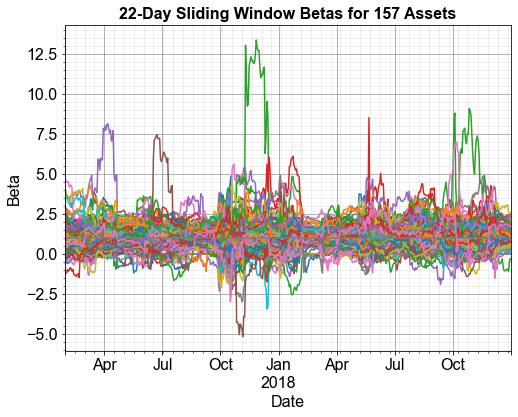

In [3]:
beta_non_weighted_df
beta_non_weighted_df.plot(legend=False)

plt.title('22-Day Sliding Window Betas for 157 Assets', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Beta', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=16)
plt.yticks(fontname="arial", fontsize=16)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)

# plt.savefig('2_4_2aredo.pdf')


### 2.4.3

In [4]:
market_cap_final = df['mcap'].copy() 
market_cap_final.index = pd.to_datetime(market_cap_final.index) 
market_cap_final = market_cap_final[ret_stock_final.columns] 

ws = market_cap_final.divide(market_cap_final.sum(1), 0)

all_weighted_returns = ws*ret_stock_final.copy()
weighted_market_return = all_weighted_returns.sum(1)


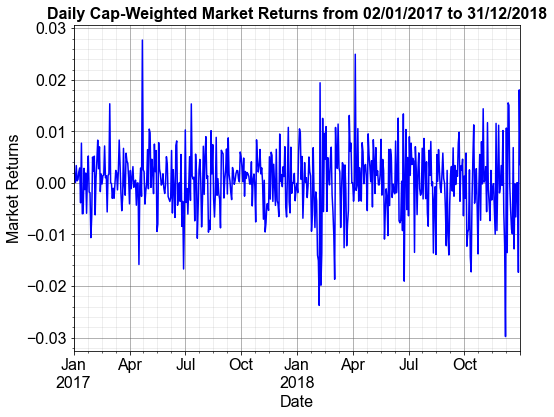

In [5]:
weighted_market_return.plot(color = 'blue')

plt.title('Daily Cap-Weighted Market Returns from 02/01/2017 to 31/12/2018', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Market Returns', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=16)
plt.yticks(fontname="arial", fontsize=16)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)

# plt.savefig('2_4_3aredo.pdf')


### 2.4.4

In [6]:
all_weighted_returns = ret_stock_final.copy() 
all_weighted_returns['market'] = weighted_market_return.copy() 

beta_weighted = pd.DataFrame(columns=all_weighted_returns.columns) 
w = 22 
for t in all_weighted_returns.index[w-1:]: 
    
    covariance_returns = all_weighted_returns[:t].iloc[-w:].cov() 
    betas = covariance_returns['market']/covariance_returns['market']['market'] 
    beta_weighted.loc[t] = betas


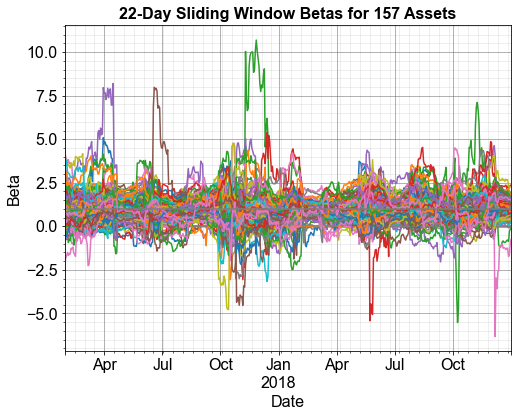

In [7]:
beta_weighted.plot(legend=False)

plt.title('22-Day Sliding Window Betas for 157 Assets', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Beta', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=16)
plt.yticks(fontname="arial", fontsize=16)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)

# plt.savefig('2_4_4aredo.pdf')
